# What's the best deal when it comes to floor count?

#### Data Science 410 BB
#### University of Washington Professional & Continuing Education

#### Homework 2: Exploring Multivariate Data
#### Leo Salemann, 1/18/18

## Introduction
In this notebook, we'll be looking at [Kaggle's King Country House Sales Data](https://www.kaggle.com/harlfoxem/housesalesprediction/data), splitting the data set by floor count, and looking for the best deals in terms of price, age, and condition.

## A bit of Prep Work
Load the data, require some libraries, nothing much to see here.

In [1]:
read.housing = function(file = 'kc_house_data.csv'){
  ## Read the csv file
  kc.housing <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)
}

kc.housing = read.housing() 

In [2]:
options(repr.plot.width=8, repr.plot.height=8)
require(car)
require(ggplot2)

Loading required package: car
Loading required package: ggplot2


## Price and Availability
There's a plethora of 3.5-story properties available for a little over \$500K (below). Lots of 2.5 and some 2 story homes for a bit less. There's slightly more single-story residences available than 2.5 story, at substantially less.

Warning message:
“Removed 198 rows containing non-finite values (stat_density).”

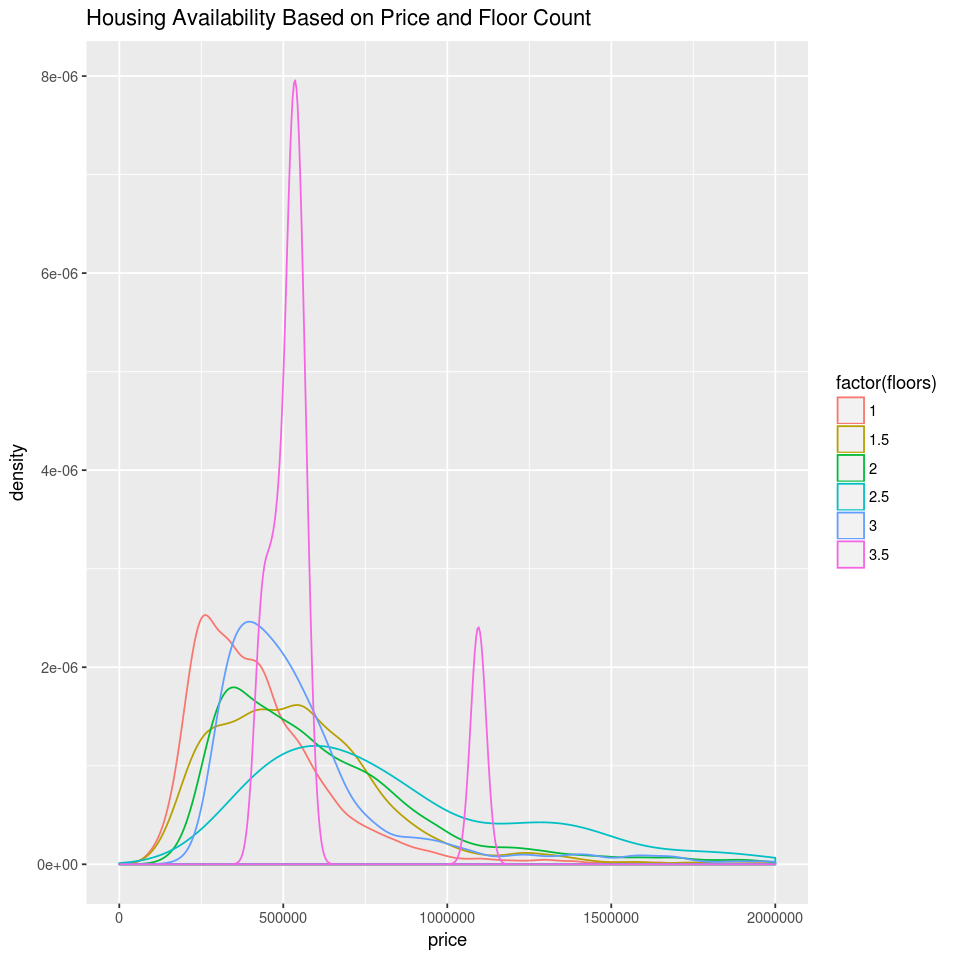

In [28]:
ggplot(kc.housing, aes(price)) + 
geom_density(aes(color = factor(floors))) + 
xlim(0, 2000000) +
ggtitle('Housing Availability Based on Price and Floor Count')

## Age and Availability 
There's been a surge of recent building activity for 3-story homes, almost all of them have been built after 2000. May of the 3.5 and 2 story homes are young as well. Single-story and especially 1.5 story homes tend to be much older.

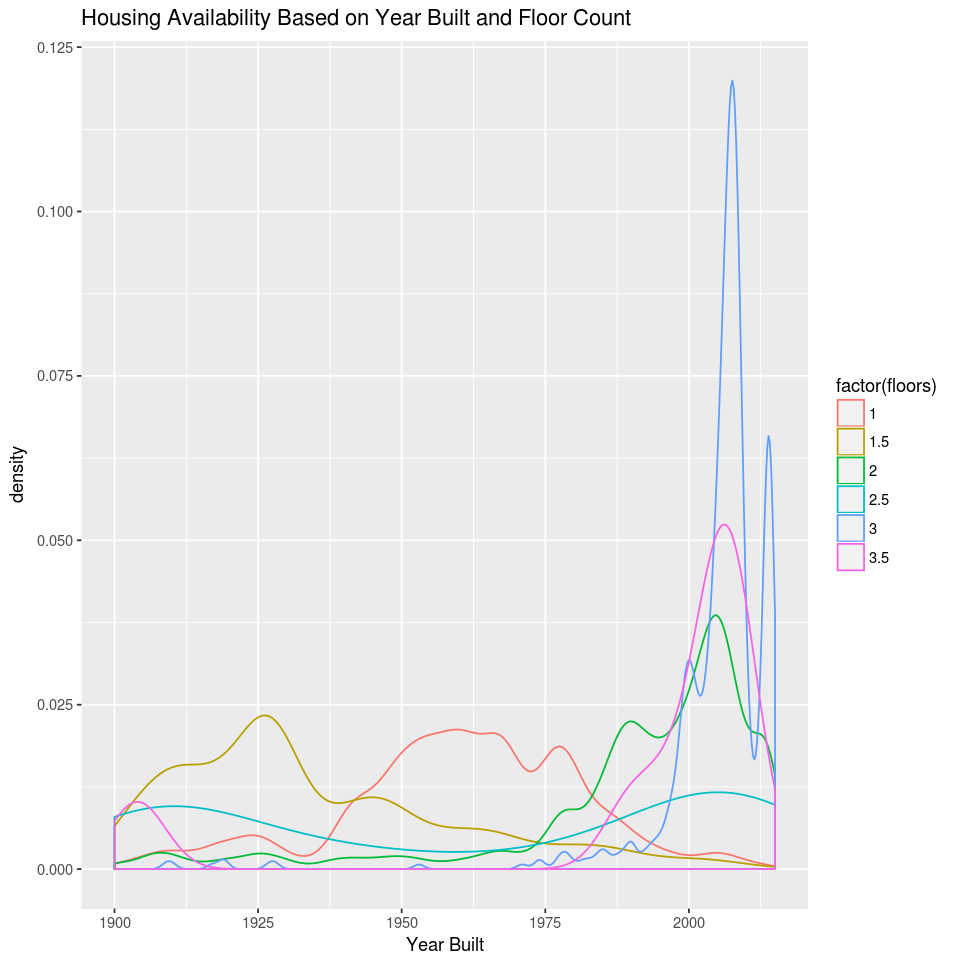

In [35]:
ggplot(kc.housing, aes(yr_built)) + 
geom_density(aes(color = factor(floors))) +
xlab('Year Built') +
ggtitle('Housing Availability Based on Year Built and Floor Count')

### Recent Renovations
When considering age, one should also consider renovation.  While single and 1.5 story homes tend to be old, most of them have been renovated since 2005.

Warning message:
“Removed 20700 rows containing non-finite values (stat_density).”

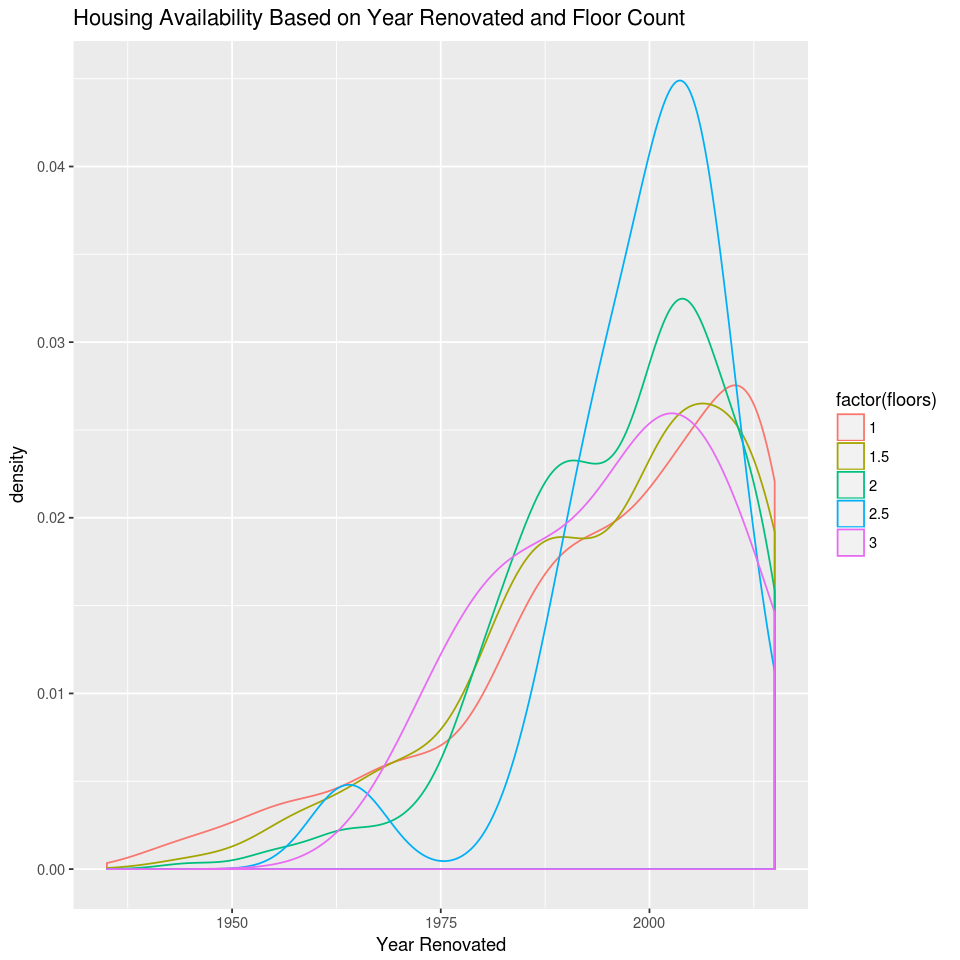

In [36]:
ggplot(kc.housing, aes(yr_renovated)) + 
xlim(c(1935, 2015)) + xlab('Year Renovated') +
geom_density(aes(color = factor(floors))) +
ggtitle('Housing Availability Based on Year Renovated and Floor Count')

## Condition and Availability
If you select 2, 2.5, 3 story homes, you're almost certain to get one in midrange condition. Higher quality homes (condition  or 5) are easier to find in the 1 and 1.5 story categories. If you're shopping for a 3.5 story home, beware that condition varies widely.

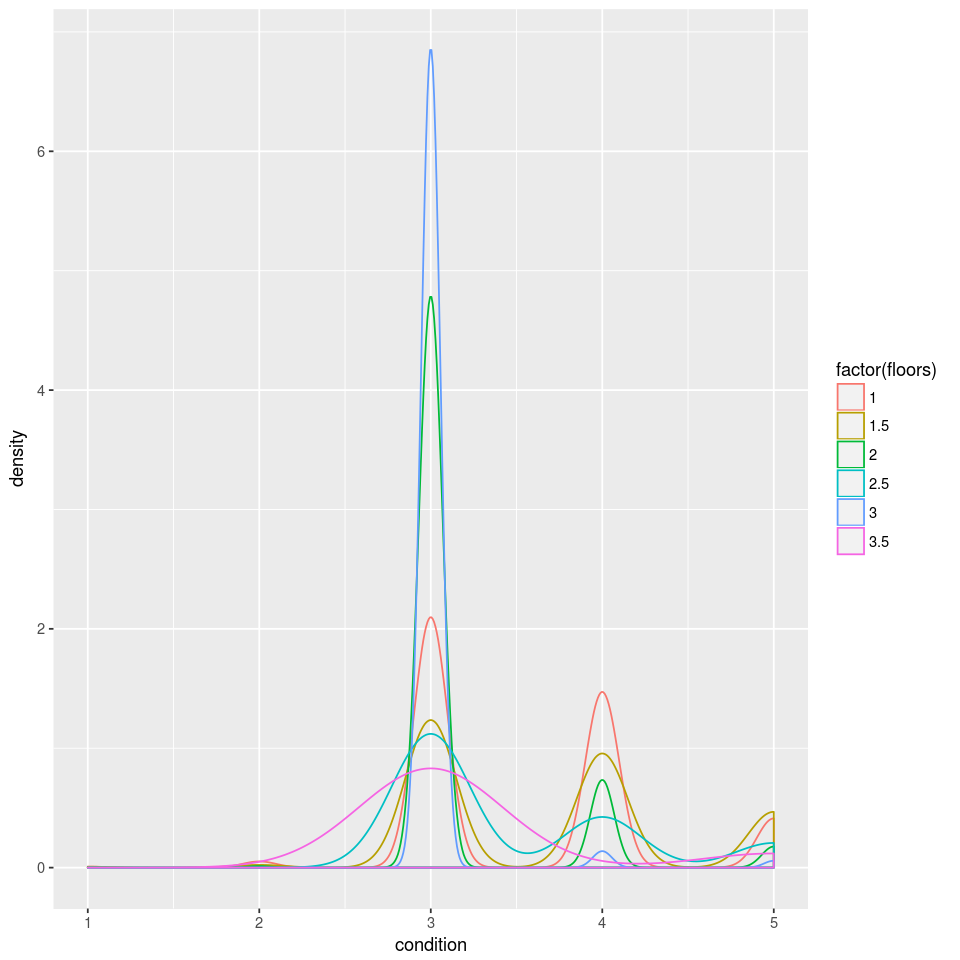

In [61]:
ggplot(kc.housing, aes(condition)) + 
geom_density(aes(color = factor(floors)))

# Conclusions

  * It's easy to find a relatively new 3.5-story property for a little over \$500K, but inspect closely; there will be a lot of variation in condition.
  * Plenty of new 3-story properties are available, which tend to be cheaper, and you're almost certain to get mid-range condition.
  * If you're looking for better condition, try a single-story. They're certain to be older, but likely to be recently renovated, and are the most likley to score better than average condition.
  * The 1.5-story homes are somewhat comparable to the single-stories, but likely to be even older, with more variation in price.